# The cosine similarity of posts（Word２Vec）
We perform morphological analysis of the posts using the MeCab library, convert each word to a vector (embedding) using Word2Vec, compute the Cos similarity and calculate the average to calculate quantitative similarity.

We used the Japanese models for Word2Vec given by M. Suzuki, see https://github.com/singletongue/WikiEntVec.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random as r
from tqdm import tqdm_notebook as tqdm
import MeCab
import gensim

Dir_name = 'entity_vector/jawiki.all_vectors.300d.txt'
fname1 = '/Users/goda/Desktop/Dissatisfaction/data/table-posts.csv'
fname2 = '/Users/goda/Desktop/Dissatisfaction/gender/gender_data_12.csv'

data = pd.read_csv(fname1) 
gender_data = pd.read_csv(fname2) 

In [2]:
data["text"][:5]

0    最近の内容は、のび太が、他力本願ですぐ調子にのり、エゴが強すぎると感じている。子供に見せたく...
1                    ヤクルトの舌や喉に何か残る感じの、あれは何でしょう?すごくいやだ。
2                                めばちこ痛い。\n治ってもまたできる...
3    タケダは、からだ浸透補水液は病院の消毒液を連想させる味がします。体に良くても飲み物としてなじ...
4                         チョコリングの個性が弱くて商品として地味で美味しくない。
Name: text, dtype: object

In [3]:
gender_data['text'][:5]

0      特殊な女の付き合いが面倒。\nそれなのに、男も女化している人が増えてきて、相手をするのが面倒。
1    タイミングが遅い!24時間営業だからといってあれはひどい。生鮮品野菜の見切り品コーナーは特に...
2    男女2人で利用したところ、「デートでこんなとこ来るとか」とひそひそ話される声が聞こえて不愉快でした
3    大家のセクハラ発言。二人目はまだか、最近見ないが二人目できたのか、女は嫁に行くから男を産まな...
4    男女平等という言葉を聞きますが、平等は特定の人たちの待遇を優遇するモノだと思いません!\n平...
Name: text, dtype: object

## Morphological Analysis and Tokenization Using Mecab

In [4]:
mecab = MeCab.Tagger("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd -Owakati")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(Dir_name)

In [5]:
# 分散表現を得る関数
def avg_feature_vector(sentence, model, num_features):
    words = mecab.parse(sentence).replace(' \n', '').split() # The morphological analysis of mecab results in a line break at the end (\n), so remove.
    feature_vec = np.zeros(num_features, dtype="float32") # Initialization of embedding.
    for word in words:
        feature_vec = np.add(feature_vec, model[word])
    if len(words) > 0:
        feature_vec = np.divide(feature_vec, len(words))
    return feature_vec

In [6]:
avg_feature_vector("彼は昨日、お腹を壊した", word2vec_model, 300) # He had a stomach bug yesterday.

array([ 4.10136171e-02, -1.43701822e-01, -4.55489308e-02, -3.06330528e-02,
        6.68221712e-02, -2.43130356e-01, -2.15325672e-02, -5.90505823e-02,
       -2.12026522e-01,  4.61664535e-02, -4.21478711e-02,  1.18562832e-01,
       -2.41821244e-01, -1.39527351e-01,  1.06845587e-01, -4.10868786e-02,
        2.85407193e-02,  1.82038769e-01,  2.96302028e-02,  1.13485552e-01,
       -2.04176977e-01,  8.36354345e-02,  1.33410275e-01,  2.79216796e-01,
       -2.70348415e-02, -6.04824163e-04, -2.41559118e-01,  6.25444055e-02,
       -1.84329554e-01, -2.08334178e-01,  1.91315815e-01,  5.56609184e-02,
        2.35891983e-01,  2.14668006e-01, -1.61370635e-01, -1.50671840e-01,
        5.93593866e-02, -3.45638618e-02, -1.73775777e-02, -3.06529328e-02,
       -1.14202626e-01, -5.73668163e-04, -1.55036047e-01, -2.11968441e-02,
        3.54082137e-02,  1.49815023e-01, -1.42127812e-01,  6.03734627e-02,
        8.49991441e-02,  3.10012070e-03,  4.88437191e-02, -1.18733965e-01,
       -2.96113919e-03, -

## Cosine similarity

$a,b$ : embeddings of posts

\begin{align*}
\cos(a,b) = \frac{a \cdot b}{|a||b|}
\end{align*}

In [7]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [8]:
print(len(data["text"]), len(gender_data["text"]))

5248820 24553


In [9]:
text1 = '東京都の大学で数学の研究をしています。' # I study mathematics at a university in Tokyo.
text2 = '私は東京で統計学の勉強に励んでいる。' # I study statistics in Tokyo.
text3 = '東京都は住むのには良い街です。' # Tokyo is a good city to live in.
text4 = '彼は野球が好きです。' # He likes baseball.
vector1 = avg_feature_vector(text1, word2vec_model, 300)
vector2 = avg_feature_vector(text2, word2vec_model, 300)
vector3 = avg_feature_vector(text3, word2vec_model, 300)
vector4 = avg_feature_vector(text4, word2vec_model, 300)
sim2 = cos_sim(vector1, vector2)
sim3 = cos_sim(vector1, vector3)
sim4 = cos_sim(vector1, vector4)
print(sim2, sim3, sim4)

0.9457662 0.91024595 0.85925585


In [10]:
r.seed(0)
M = 10000
cos_list = []
cnt=0
from logging import getLogger, StreamHandler, DEBUG
pbar = tqdm(total=M)
while(cnt<M):
    text1, text2 = r.choices(data["text"], k=2)
    try:
        vector1 = avg_feature_vector(text1, word2vec_model, 300)
        vector2 = avg_feature_vector(text2, word2vec_model, 300)
    except KeyError as error:
        print(error)
        continue
    sim = cos_sim(vector1, vector2)
    cos_list.append(sim)
    cnt += 1
    pbar.update(1)
pbar.close()

"word 'WACOM' not in vocabulary"
"word '取り入れろ' not in vocabulary"
"word 'のし紙' not in vocabulary"
"word '値下り' not in vocabulary"
"word '畳める' not in vocabulary"
"word '座ん' not in vocabulary"
"word '高いー' not in vocabulary"
"word 'キャラメルコーン' not in vocabulary"
"word 'クリームコロネ' not in vocabulary"
"word 'ジャパンネット銀行' not in vocabulary"
"word '山間部' not in vocabulary"
"word '~。' not in vocabulary"
"word 'カラフェ' not in vocabulary"
"word 'やく出' not in vocabulary"
"word '値段相応' not in vocabulary"
"word '...???' not in vocabulary"
"word 'LINEのお年玉' not in vocabulary"
"word 'ざいしつこい' not in vocabulary"
"word '綾部祐二' not in vocabulary"
"word 'もさっと' not in vocabulary"
"word '無洗米' not in vocabulary"
"word '凝ろ' not in vocabulary"
"word '^^;' not in vocabulary"
"word 'ゅぶにゅして' not in vocabulary"
"word 'ノンフライヤー' not in vocabulary"
"word '失くなる' not in vocabulary"
"word 'き品' not in vocabulary"
"word 'イージーファイバー' not in vocabulary"
"word 'がーっと' not in vocabulary"
"word 'ろくなもんじゃねえ' not in vocabulary"
"word 'ネチャネチャ' not 

"word '払方' not in vocabulary"
"word 'スマホ対応手袋' not in vocabulary"
"word 'ヨワ' not in vocabulary"
"word 'ワンデーアキュビューモイスト' not in vocabulary"
"word '認知症予防' not in vocabulary"
"word 'モリジョブ' not in vocabulary"
"word 'ずらかっ' not in vocabulary"
"word 'コーヒーフレッシュ' not in vocabulary"
"word 'ノルマ達成' not in vocabulary"
"word 'ピッピッと' not in vocabulary"
"word 'つまんなかっ' not in vocabulary"
"word '鍋焼き' not in vocabulary"
"word '折畳ま' not in vocabulary"
"word '(T-T)' not in vocabulary"
"word 'ポンタカード' not in vocabulary"
"word 'オーナーズカードキャッシュバック' not in vocabulary"
"word '60000円' not in vocabulary"
"word 'デマツイート' not in vocabulary"
"word 'ありき' not in vocabulary"
"word '何千円' not in vocabulary"
"word 'すさめ' not in vocabulary"
"word '太すぎ' not in vocabulary"
"word '~?」' not in vocabulary"
"word '見づらいっ' not in vocabulary"
"word '詰め替えよ' not in vocabulary"
"word '大村駅' not in vocabulary"
"word '新しいく' not in vocabulary"
"word '茶こし' not in vocabulary"
"word '岐阜県民' not in vocabulary"
"word '羨ましいー' not in vocabulary"
"word '

"word 'ほしぃ' not in vocabulary"
"word 'チンジャオロース' not in vocabulary"
"word '見やすかっ' not in vocabulary"
"word 'カツ煮' not in vocabulary"
"word '雨宮塔子' not in vocabulary"
"word 'ドゥミルネッサンス' not in vocabulary"
"word 'ティプラス' not in vocabulary"
"word 'ボコッと' not in vocabulary"
"word '?(`' not in vocabulary"
"word '離婚報道' not in vocabulary"
"word 'ヤダヤダー' not in vocabulary"
"word '出来立て' not in vocabulary"
"word '濃い〜' not in vocabulary"
"word 'はなまるうどん' not in vocabulary"
"word '...(╬◣' not in vocabulary"
"word '抜きかえ' not in vocabulary"
"word 'すすが' not in vocabulary"
"word 'マチカフェ' not in vocabulary"
"word 'ババシャツ' not in vocabulary"
"word '実質無料' not in vocabulary"
"word 'クーカ' not in vocabulary"
"word 'そうじゃない' not in vocabulary"
"word '返品交換' not in vocabulary"
"word '筋ばっ' not in vocabulary"
"word '続きを読む' not in vocabulary"
"word '干支占い' not in vocabulary"
"word 'Amazonギフト券' not in vocabulary"
"word '食器洗' not in vocabulary"
"word '持運び' not in vocabulary"
"word 'ぐびぐび' not in vocabulary"
"word '嫌なら辞めろ' not in

"word 'バングラデシュ製' not in vocabulary"
"word 'ラッキーゴール' not in vocabulary"
"word '-;)' not in vocabulary"
"word 'ーラッシュ' not in vocabulary"
"word 'ワカル' not in vocabulary"
"word '図々しかっ' not in vocabulary"
"word '箱崎駅' not in vocabulary"
"word 'オフダ' not in vocabulary"
"word 'アダルトブログ' not in vocabulary"
"word 'ニッカシードル' not in vocabulary"
"word 'ゴソゴソ' not in vocabulary"
"word 'ダフトパンク' not in vocabulary"
"word '\\)' not in vocabulary"
"word '26000円' not in vocabulary"
"word 'さーーーーー' not in vocabulary"
"word 'ルルカカード' not in vocabulary"
"word 'リップバーム' not in vocabulary"
"word 'しなもの' not in vocabulary"
"word '➰' not in vocabulary"
"word 'かき氷器' not in vocabulary"
"word 'ゃべりかたがいまだに' not in vocabulary"
"word 'ーーーーーーー' not in vocabulary"
"word 'アクアビーズ' not in vocabulary"
"word '税込表示' not in vocabulary"
"word ':◯◯' not in vocabulary"
"word 'ヤマトホールディングス' not in vocabulary"
"word 'プーアル茶' not in vocabulary"
"word 'エコヒイキ' not in vocabulary"
"word '~!' not in vocabulary"
"word '天神地下街' not in vocabulary"
"word

"word '4968円' not in vocabulary"
"word '使用方法' not in vocabulary"
"word 'プラゴミ' not in vocabulary"
"word 'み立て' not in vocabulary"
"word '午後ティー' not in vocabulary"
"word '地かどう' not in vocabulary"
"word 'モソモソ' not in vocabulary"
"word 'リサイクルプラ' not in vocabulary"
"word 'ホームベーカリー' not in vocabulary"
"word 'バシャバシャ' not in vocabulary"
"word '実店舗' not in vocabulary"
"word 'ぐちゃっと' not in vocabulary"
"word '寝っ転がる' not in vocabulary"
"word '...(>_<;)' not in vocabulary"
"word 'スポッと' not in vocabulary"
"word '小牧ジャンクション' not in vocabulary"
"word 'バスボム' not in vocabulary"
"word 'だんっ' not in vocabulary"
"word 'ノンフライヤー' not in vocabulary"
"word 'らん間' not in vocabulary"
"word '季重なり' not in vocabulary"
"word 'Amazonギフト券' not in vocabulary"
"word '~~~~~~~' not in vocabulary"
"word 'カピカピ' not in vocabulary"
"word 'はね上がる' not in vocabulary"
"word '自由気まま' not in vocabulary"
"word '折りたたみ傘' not in vocabulary"
"word 'もう犬' not in vocabulary"
"word 'ホットモット' not in vocabulary"
"word 'マイバック' not in vocabulary"
"wo

"word 'カピカピ' not in vocabulary"
"word 'ドッグベッド' not in vocabulary"
"word '一本満足バー' not in vocabulary"
"word 'ウスウス' not in vocabulary"
"word '緊急性' not in vocabulary"
"word 'ふせげる' not in vocabulary"
"word '生春巻' not in vocabulary"
"word 'ギリギリファール' not in vocabulary"
"word 'グールガン' not in vocabulary"
"word 'タカラスタンダード' not in vocabulary"
"word 'もったいなかっ' not in vocabulary"
"word 'またさ' not in vocabulary"
"word '(ToT)' not in vocabulary"
"word 'テェ' not in vocabulary"
"word '靴ベラ' not in vocabulary"
"word 'エアリーシェイプ' not in vocabulary"
"word 'ピレパラアース' not in vocabulary"
"word '>_<!!' not in vocabulary"
"word '~!' not in vocabulary"
"word '食べ方' not in vocabulary"
"word '紛らわしいっ' not in vocabulary"
"word '(♯`∧' not in vocabulary"
"word 'デシャップ' not in vocabulary"
"word 'ダイエットサプリ' not in vocabulary"
"word 'やしなっ' not in vocabulary"
"word '2連休' not in vocabulary"
"word '甘ったる' not in vocabulary"
"word '((+_+)' not in vocabulary"
"word 'ぬるかっ' not in vocabulary"
"word 'こげる' not in vocabulary"
"word 'ライメックス' n

"word '医療用' not in vocabulary"
"word 'ワカル' not in vocabulary"
"word '心がざわつく' not in vocabulary"
"word '麻婆春雨' not in vocabulary"
"word '❓' not in vocabulary"
"word 'リマインドアプリ' not in vocabulary"
"word '神戸物産' not in vocabulary"
"word 'クイッと' not in vocabulary"
"word 'ビストロスマップ' not in vocabulary"
"word 'もみない' not in vocabulary"
"word 'フレーバーウォーター' not in vocabulary"
"word 'きた側' not in vocabulary"
"word '機種変' not in vocabulary"
"word 'るのー' not in vocabulary"
"word 'なるし' not in vocabulary"
"word '子供手当' not in vocabulary"
"word '決済手数料' not in vocabulary"
"word '言い分け' not in vocabulary"
"word 'ゆすぎ' not in vocabulary"
"word '当落確認' not in vocabulary"
"word 'ほしいー' not in vocabulary"
"word 'るぅと' not in vocabulary"
"word 'ディープライス' not in vocabulary"
"word '・・オィ' not in vocabulary"
"word 'ワールドブッフェ' not in vocabulary"
"word '自動更新' not in vocabulary"
"word 'アマノフーズ' not in vocabulary"
"word 'ヂュアルディスプレイ' not in vocabulary"
"word '洗いもの' not in vocabulary"
"word '配偶者控除' not in vocabulary"
"word 'てぃらみす' not 

"word 'あたたまら' not in vocabulary"
"word 'ゃならないのよぉ' not in vocabulary"
"word '道路工事' not in vocabulary"
"word 'モヤる' not in vocabulary"
"word 'カチっと' not in vocabulary"
"word 'なんだかなぁ' not in vocabulary"
"word '晴れ渡り' not in vocabulary"
"word '...??' not in vocabulary"
"word '..?' not in vocabulary"
"word 'タバコ臭' not in vocabulary"
"word 'トリュフソルト' not in vocabulary"
"word '白神こだま酵母' not in vocabulary"
"word '~!?' not in vocabulary"
"word '紅月' not in vocabulary"
"word '年には勝てない' not in vocabulary"
"word '煮込め' not in vocabulary"
"word 'もちもちの木' not in vocabulary"
"word 'スッゴク' not in vocabulary"
"word 'SMAPファン' not in vocabulary"
"word 'ボロっちく' not in vocabulary"
"word '防水スプレー' not in vocabulary"
"word 'むくと' not in vocabulary"
"word 'ピンポンダマ' not in vocabulary"
"word 'ナビダイヤル' not in vocabulary"
"word 'ひんと' not in vocabulary"
"word 'じ人' not in vocabulary"
"word 'スタッフジャンバー' not in vocabulary"
"word 'シャンブー' not in vocabulary"
"word 'セミワイドパンツ' not in vocabulary"
"word 'シマダヤ' not in vocabulary"
"word 'かたまる

"word 'キャンメイク' not in vocabulary"
"word 'サポートサプリ' not in vocabulary"
"word '〜♫' not in vocabulary"
"word 'タルト生地' not in vocabulary"
"word 'オランジーナ' not in vocabulary"
"word '...。。' not in vocabulary"
"word 'Jsoulbrothers' not in vocabulary"
"word 'ブロッコリースプラウト' not in vocabulary"
"word 'グチグチ' not in vocabulary"
"word 'シルバーウイーク' not in vocabulary"
"word '招提大谷' not in vocabulary"
"word 'アスティーグ' not in vocabulary"
"word 'ヒステリックミニ' not in vocabulary"
"word 'パッーケージ' not in vocabulary"
"word 'はま寿司' not in vocabulary"
"word '18祭' not in vocabulary"
"word '(O_O)' not in vocabulary"
"word '(^_^;)' not in vocabulary"
"word '親方日の丸' not in vocabulary"
"word 'ドカッと' not in vocabulary"
"word '(--;)' not in vocabulary"
"word 'つけかえる' not in vocabulary"
"word '硬ーく' not in vocabulary"
"word 'メンドクサイ' not in vocabulary"
"word 'きどっ' not in vocabulary"
"word '立ちどまら' not in vocabulary"
"word '眠たいっ' not in vocabulary"
"word '三中元克' not in vocabulary"
"word '~!' not in vocabulary"
"word 'うみださ' not in vocabulary"
"

"word 'むりにたくさん' not in vocabulary"
"word '不愉快です' not in vocabulary"
"word '事故防止' not in vocabulary"
"word '聞きあき' not in vocabulary"
"word '~。' not in vocabulary"
"word '`)...' not in vocabulary"
"word '機種変' not in vocabulary"
"word '暑いー' not in vocabulary"
"word '半ラ' not in vocabulary"
"word 'ピートロ' not in vocabulary"
"word 'はなれよ' not in vocabulary"
"word '粉末だし' not in vocabulary"
"word 'ゴホゴホッと' not in vocabulary"
"word '1人目' not in vocabulary"
"word '(ー' not in vocabulary"
"word '仕入値' not in vocabulary"
"word '(-。-;' not in vocabulary"
"word '韓国人学校' not in vocabulary"
"word 'マタニティマーク' not in vocabulary"
"word 'きよー' not in vocabulary"
"word 'プチっと' not in vocabulary"
"word 'ガリリッ' not in vocabulary"
"word '...?」' not in vocabulary"
"word 'お絞り' not in vocabulary"
"word '~??' not in vocabulary"
"word '💢' not in vocabulary"
"word '...。「' not in vocabulary"
"word 'アクアダンス' not in vocabulary"
"word '起きあがれ' not in vocabulary"
"word 'もったいなく' not in vocabulary"
"word 'おつとめ品' not in vocabulary"
"wo

"word 'ですか' not in vocabulary"
"word 'ぴったんこカンカン' not in vocabulary"
"word '実店舗' not in vocabulary"
"word 'はま寿司' not in vocabulary"
"word '入園料' not in vocabulary"
"word '✊' not in vocabulary"
"word '難くせ' not in vocabulary"
"word '六一〇ハップ' not in vocabulary"
"word 'ゾゾタウン' not in vocabulary"
"word 'ぺらっ' not in vocabulary"
"word 'シャッフルプリント' not in vocabulary"
"word 'ブラウザゲームプレイ' not in vocabulary"
"word 'VS嵐' not in vocabulary"
"word '全店舗' not in vocabulary"
"word 'ぽかっ' not in vocabulary"
"word 'ドバッと' not in vocabulary"
"word 'ウォッシュレット' not in vocabulary"
"word 'ジャンパー膝' not in vocabulary"
"word 'SMAP解散' not in vocabulary"
"word '好きだ' not in vocabulary"
"word 'ほつれる' not in vocabulary"
"word '松木安太郎' not in vocabulary"
"word 'おさえろ' not in vocabulary"
"word '道路工事' not in vocabulary"
"word '500w' not in vocabulary"
"word 'べちゃべちゃ' not in vocabulary"
"word '角栓' not in vocabulary"
"word '剣と魔法のログレス' not in vocabulary"
"word '何円' not in vocabulary"
"word 'グチャ' not in vocabulary"
"word '❹_' not in voca

"word 'ろがー' not in vocabulary"
"word 'ゆがく' not in vocabulary"
"word '上西小百合' not in vocabulary"
"word '社会進出' not in vocabulary"
"word 'ですか' not in vocabulary"
"word 'しつこかっ' not in vocabulary"
"word 'ざいのか' not in vocabulary"
"word 'こさえる' not in vocabulary"
"word 'キャンメイク' not in vocabulary"
"word 'ぉはょぉ' not in vocabulary"
"word 'アマゾンギフト券' not in vocabulary"
"word 'ワカル' not in vocabulary"
"word 'タバコ臭' not in vocabulary"
"word 'ジュラシックソルト' not in vocabulary"
"word 'タートテント' not in vocabulary"
"word 'イシクラゲ' not in vocabulary"
"word 'ほざい' not in vocabulary"
"word 'ショクパン' not in vocabulary"
"word 'アンガス牛' not in vocabulary"
"word '~。' not in vocabulary"
"word '塞げる' not in vocabulary"
"word 'すりおろし器' not in vocabulary"
"word 'ミッションン' not in vocabulary"
"word 'バックフォグ' not in vocabulary"
"word 'SBJ銀行' not in vocabulary"
"word 'つかまり立ち' not in vocabulary"
"word 'エアコンクリーナ' not in vocabulary"
"word '拭き取ろ' not in vocabulary"
"word 'プツッと' not in vocabulary"
"word '水アカ' not in vocabulary"
"word 'ほったらかす' not

"word 'あやそ' not in vocabulary"
"word '削除予定' not in vocabulary"
"word '見切り品' not in vocabulary"
"word 'マンブラザーズバンド' not in vocabulary"
"word '福山西警察署' not in vocabulary"
"word '耳触り' not in vocabulary"
"word '本庄早稲田駅' not in vocabulary"
"word '開けしめ' not in vocabulary"
"word '~~~' not in vocabulary"
"word 'どかっと' not in vocabulary"
"word 'キャリーケース' not in vocabulary"
"word '¥5000' not in vocabulary"
"word 'デンターシステマ' not in vocabulary"
"word '仕事がら' not in vocabulary"
"word 'シチューミクス' not in vocabulary"
"word '手つけ' not in vocabulary"
"word 'ベトナム製' not in vocabulary"
"word 'カスタードホイップ' not in vocabulary"
"word '怖いー' not in vocabulary"
"word '仕事内容' not in vocabulary"
"word '転け' not in vocabulary"
"word 'ワイヤレスマイク' not in vocabulary"
"word '茎わかめ' not in vocabulary"
"word 'シャブピー' not in vocabulary"
"word '意地汚' not in vocabulary"
"word 'ーーーーーー' not in vocabulary"
"word '断れれ' not in vocabulary"
"word 'ワンマンズドリーム' not in vocabulary"
"word 'サンドイッチ用食パン' not in vocabulary"
"word '...!!(;' not in vocabulary"
"

In [11]:
r.seed(0)
M = 10000
gender_cos_list = []
cnt=0
pbar = tqdm(total=M)
while(cnt<M):
    text1, text2 = r.choices(gender_data["text"], k=2)
    try:
        vector1 = avg_feature_vector(text1, word2vec_model, 300)
        vector2 = avg_feature_vector(text2, word2vec_model, 300)
    except KeyError as error:
        print(error)
        continue
    sim = cos_sim(vector1, vector2)
    gender_cos_list.append(sim)
    cnt += 1
    pbar.update(1)
pbar.close()

"word '傷つけん' not in vocabulary"
"word '踏み切れる' not in vocabulary"
"word '雇用機会' not in vocabulary"
"word 'トイレットルーム' not in vocabulary"
"word 'ベチャベチャ' not in vocabulary"
"word '女に' not in vocabulary"
"word '婦人科検診' not in vocabulary"
"word '❗❗❗' not in vocabulary"
"word '女に' not in vocabulary"
"word '眠いっ' not in vocabulary"
"word 'ホンマでっかTV' not in vocabulary"
"word 'スパワールド' not in vocabulary"
"word 'リニュウアル' not in vocabulary"
"word 'ワザト' not in vocabulary"
"word '😠' not in vocabulary"
"word 'キメポーズ' not in vocabulary"
"word 'ZUCCA' not in vocabulary"
"word 'ありき' not in vocabulary"
"word '祝福ムード' not in vocabulary"
"word '尻軽女' not in vocabulary"
"word '上板町立上板中学校' not in vocabulary"
"word '追い越' not in vocabulary"
"word 'ポップコーンバゲット' not in vocabulary"
"word '女性割引' not in vocabulary"
"word 'ーモラル' not in vocabulary"
"word '2級' not in vocabulary"
"word '遠退ける' not in vocabulary"
"word 'ずかずか' not in vocabulary"
"word '恋愛感情' not in vocabulary"
"word 'コーディガン' not in vocabulary"
"word 'レディースデイ' not in 

"word 'いすゞ自動車販売' not in vocabulary"
"word '女に' not in vocabulary"
"word 'キャッキャ' not in vocabulary"
"word '聞きづらい' not in vocabulary"
"word '押し通せる' not in vocabulary"
"word 'ラブポーションサーティワン' not in vocabulary"
"word 'じごうじとく' not in vocabulary"
"word 'ニシムタ' not in vocabulary"
"word '社会進出' not in vocabulary"
"word 'ぎりぎりセーフ' not in vocabulary"
"word '寄り付こ' not in vocabulary"
"word 'クールビス' not in vocabulary"
"word '女に' not in vocabulary"
"word '大人用' not in vocabulary"
"word '~○○' not in vocabulary"
"word '女に' not in vocabulary"
"word '車がい' not in vocabulary"
"word '鉄腕ダッシュ' not in vocabulary"
"word 'サッサと' not in vocabulary"
"word 'ポイッ' not in vocabulary"
"word '「??」' not in vocabulary"
"word '砂糖税' not in vocabulary"
"word '女に' not in vocabulary"
"word '男性ウケ' not in vocabulary"
"word '❓' not in vocabulary"
"word '出合い系' not in vocabulary"
"word 'るのー' not in vocabulary"
"word '変質者' not in vocabulary"
"word 'プロ彼女' not in vocabulary"
"word '車校' not in vocabulary"
"word 'ゲスの極み乙女' not in vocabulary"
"

"word '福井澄郎' not in vocabulary"
"word '貫けよ' not in vocabulary"
"word 'ガウチョパンツ' not in vocabulary"
"word 'しつこかっ' not in vocabulary"
"word 'オエー' not in vocabulary"
"word '...。(' not in vocabulary"
"word '社会進出' not in vocabulary"
"word 'KABAちゃん' not in vocabulary"
"word '女に' not in vocabulary"
"word '10368' not in vocabulary"
"word '機種変' not in vocabulary"
"word 'ラタンボックス' not in vocabulary"
"word 'いらっと' not in vocabulary"
"word 'せき込む' not in vocabulary"
"word 'セクハラパワハラモラハラ' not in vocabulary"
"word 'ラパルレ' not in vocabulary"
"word '授かり婚' not in vocabulary"
"word 'ミヤネヤ' not in vocabulary"
"word '女性化' not in vocabulary"
"word '*`' not in vocabulary"
"word '剣と魔法のログレス' not in vocabulary"
"word '引き上げろ' not in vocabulary"
"word '大人用' not in vocabulary"
"word '男性保育士' not in vocabulary"
"word 'モゾワンダーシティ' not in vocabulary"
"word 'チエッ' not in vocabulary"
"word 'ゾゾタウン' not in vocabulary"
"word 'ダボっと' not in vocabulary"
"word '意味不' not in vocabulary"
"word '女に' not in vocabulary"
"word 'そうじゃない' not i

"word '女子アナの罰' not in vocabulary"
"word '実店舗' not in vocabulary"
"word '力無い' not in vocabulary"
"word '暑けれ' not in vocabulary"
"word '女医・倉石祥子' not in vocabulary"
"word '剃ろ' not in vocabulary"
"word '女に' not in vocabulary"
"word '`;)' not in vocabulary"
"word '男モノ' not in vocabulary"
"word '女に' not in vocabulary"
"word '~...' not in vocabulary"
"word '年した' not in vocabulary"
"word 'メールヌード' not in vocabulary"
"word 'なんだかなぁ' not in vocabulary"
"word '(^_^;)' not in vocabulary"
"word 'ホットペーパービューティー' not in vocabulary"
"word 'ゴルメコーナー' not in vocabulary"
"word '2人目' not in vocabulary"
"word '相談窓口' not in vocabulary"
"word '(^_^;)' not in vocabulary"
"word 'バラつく' not in vocabulary"
"word '女に' not in vocabulary"
"word '悪い意味' not in vocabulary"
"word '恋愛感情' not in vocabulary"
"word 'KOba' not in vocabulary"
"word 'ごーーー' not in vocabulary"
"word '女に' not in vocabulary"
"word 'ようがし' not in vocabulary"
"word '底なし沼' not in vocabulary"
"word 'イケメンマッチョ' not in vocabulary"
"word '...(*' not in vocabul

"word '言い間違い' not in vocabulary"
"word '顔剃' not in vocabulary"
"word '社会進出' not in vocabulary"
"word '❓' not in vocabulary"
"word 'セクハラギリギリ' not in vocabulary"
"word '酒臭く' not in vocabulary"
"word '上西小百合' not in vocabulary"
"word 'すれ違' not in vocabulary"
"word 'こう鉄' not in vocabulary"
"word '難ご' not in vocabulary"
"word '力関係' not in vocabulary"
"word '再婚禁止期間' not in vocabulary"
"word 'ぴょこっ' not in vocabulary"
"word '横浜ポルタ' not in vocabulary"
"word '有効期限' not in vocabulary"
"word '❓' not in vocabulary"
"word 'マタニティマーク' not in vocabulary"
"word 'プールニ' not in vocabulary"
"word '大多数' not in vocabulary"
"word 'びちょびちょ' not in vocabulary"
"word '子どもを産む機械' not in vocabulary"
"word '_<。)' not in vocabulary"
"word '企業側' not in vocabulary"
"word 'カッカカカカッカッカッカッカー' not in vocabulary"
"word '男の子女の子' not in vocabulary"
"word '着よう' not in vocabulary"
"word '年した' not in vocabulary"
"word '〗' not in vocabulary"
"word 'なんだかなぁ' not in vocabulary"
"word '❓(' not in vocabulary"
"word 'すた丼' not in vocabulary

"word '蓋開け' not in vocabulary"
"word '(`_' not in vocabulary"
"word 'マルチコピー機' not in vocabulary"
"word '剥せる' not in vocabulary"
"word 'ウィッグ・・・' not in vocabulary"
"word 'ナムサンミ' not in vocabulary"
"word '~。' not in vocabulary"
"word 'ドンフリークス・ネテロジュニア' not in vocabulary"
"word 'しゃきっ' not in vocabulary"
"word '仕事してないくせに' not in vocabulary"
"word 'じゅう水' not in vocabulary"
"word '社会進出' not in vocabulary"
"word '臭いっ' not in vocabulary"
"word 'ボソッ' not in vocabulary"
"word 'のたまっ' not in vocabulary"
"word 'ゃべりはやめたほうがいい' not in vocabulary"
"word 'とかそ' not in vocabulary"
"word '鶯谷駅' not in vocabulary"
"word '?!。' not in vocabulary"
"word '箱崎駅' not in vocabulary"
"word '男性の育休' not in vocabulary"
"word 'おうん' not in vocabulary"
"word '怖いっ' not in vocabulary"
"word '地ひびき' not in vocabulary"
"word 'さい服' not in vocabulary"
"word 'にーっ' not in vocabulary"
"word '予想通り' not in vocabulary"
"word '女性関係' not in vocabulary"
"word 'O抗原' not in vocabulary"
"word '(ToT)' not in vocabulary"
"word 'そうじゃない' not in v

"word 'ざいよ' not in vocabulary"
"word '女性専用エリア' not in vocabulary"
"word 'ワコウド' not in vocabulary"
"word '75000円' not in vocabulary"
"word '本田博太郎' not in vocabulary"
'word \'(-""-;)\' not in vocabulary'
"word 'ぶち当て' not in vocabulary"
"word 'なにしてんの' not in vocabulary"
"word 'ホワイトトデー' not in vocabulary"
"word '❔' not in vocabulary"
"word 'ロンパース' not in vocabulary"
"word '抗体検査' not in vocabulary"
"word '❕' not in vocabulary"
"word '_<。)' not in vocabulary"
"word 'マンモグラフイ' not in vocabulary"
"word '不愉快です' not in vocabulary"
"word 'たしかめる' not in vocabulary"
"word '男の子女の子' not in vocabulary"
"word '小さきゃ' not in vocabulary"
"word '五月蝿く' not in vocabulary"
"word '田辺警察署' not in vocabulary"
"word '給与格差' not in vocabulary"
"word '南越谷駅' not in vocabulary"
"word '~!' not in vocabulary"
"word '仕事内容' not in vocabulary"
"word 'ぃばぁちゃんは' not in vocabulary"
"word 'コ見' not in vocabulary"
"word 'お茶出し' not in vocabulary"
"word 'レディースDAY' not in vocabulary"
"word 'ロンパース' not in vocabulary"
"word '❌' not in v

"word '児童買春・児童ポルノ禁止法' not in vocabulary"
"word 'リーフウォーク' not in vocabulary"
"word 'ぁっびっくりしたぁ' not in vocabulary"
"word '女モノ' not in vocabulary"
"word '男女混合名簿' not in vocabulary"
"word '補助便座' not in vocabulary"
"word 'バチ当' not in vocabulary"
"word '認知症予防' not in vocabulary"
"word 'レディースデイ' not in vocabulary"
"word '再婚禁止期間' not in vocabulary"
"word 'サイゼリア' not in vocabulary"
"word '男性保育士' not in vocabulary"
"word '`)...' not in vocabulary"
"word '...!!' not in vocabulary"
"word '液か' not in vocabulary"
"word '女性関係' not in vocabulary"
"word 'ぇとか' not in vocabulary"
"word 'DAYPACK' not in vocabulary"
"word '池田温泉' not in vocabulary"
"word '京急百貨店' not in vocabulary"
"word '男性保育士' not in vocabulary"
"word '命じろ' not in vocabulary"
"word '男性の育休' not in vocabulary"
"word '男子ごはん' not in vocabulary"
"word '∥。。。' not in vocabulary"
"word '大人用' not in vocabulary"
"word 'レディースデイ' not in vocabulary"
"word '❌' not in vocabulary"
"word 'ずーーーっと' not in vocabulary"
"word '後棒' not in vocabulary"
"word '自慢じゃ

"word '!?((((;' not in vocabulary"
"word '3人目' not in vocabulary"
"word '新潟市秋葉区' not in vocabulary"
"word '!!!!!!!!!!!!' not in vocabulary"
"word '介護離職' not in vocabulary"
"word '男モノ' not in vocabulary"
"word 'プリント倶楽部' not in vocabulary"
"word '社会進出' not in vocabulary"
"word '女に' not in vocabulary"
"word '入店お断り' not in vocabulary"
"word 'カツカツ' not in vocabulary"
"word 'へえー' not in vocabulary"
"word 'レディースデイ' not in vocabulary"
"word '鬱陶しいっ' not in vocabulary"
"word '若いっ' not in vocabulary"
"word '子作り' not in vocabulary"
"word '伊勢崎警察署' not in vocabulary"
"word '社会進出' not in vocabulary"
"word '金銭的' not in vocabulary"
"word '顔認証' not in vocabulary"
"word 'イケメンレスラー' not in vocabulary"
"word '入場拒否' not in vocabulary"
"word 'ップル' not in vocabulary"
"word 'チエッ' not in vocabulary"
"word 'やばかっ' not in vocabulary"
"word '梨園の妻' not in vocabulary"
"word 'セクハラパワハラモラハラ' not in vocabulary"
"word 'ユーホーキャッチャー' not in vocabulary"
"word 'サッサと' not in vocabulary"
"word '重ね着' not in vocabulary"
"word '一人っ子

"word 'スゲエ' not in vocabulary"
"word '五月蝿かっ' not in vocabulary"
"word 'フィッシュピック' not in vocabulary"
"word 'すからー' not in vocabulary"
"word '医療用' not in vocabulary"
"word '一体型' not in vocabulary"
"word '3階級' not in vocabulary"
"word '極り' not in vocabulary"
"word '数又' not in vocabulary"
"word 'ゃうんだょ' not in vocabulary"
"word 'ススメバチ' not in vocabulary"
"word '加藤泰平' not in vocabulary"
"word '投じれ' not in vocabulary"
"word '˃̶͈̀௰˂̶͈́' not in vocabulary"
"word 'ノルマノルマノルマ' not in vocabulary"
"word 'あやしま' not in vocabulary"
"word '無駄金' not in vocabulary"
"word 'ドカッと' not in vocabulary"
"word '変質者' not in vocabulary"
"word '大絶賛' not in vocabulary"
"word 'セシルマクビー' not in vocabulary"
"word '女に' not in vocabulary"
"word 'アルデンティーノ' not in vocabulary"
"word 'ポイッ' not in vocabulary"
"word 'その原因、Xにあり!' not in vocabulary"
"word '1人目' not in vocabulary"
"word '(~_~;)' not in vocabulary"
"word '徳島県教育委員会' not in vocabulary"
"word 'ほざい' not in vocabulary"
"word 'これだから女' not in vocabulary"
"word '❓' not in vo

"word 'トウザ' not in vocabulary"
"word '寝っ転がっ' not in vocabulary"
"word 'フエラムネ' not in vocabulary"
"word '...)、' not in vocabulary"
"word '社会進出' not in vocabulary"
"word '少ないっ' not in vocabulary"
"word 'リスクの神様' not in vocabulary"
"word '日本大学通信教育部' not in vocabulary"
"word 'あぶなかっ' not in vocabulary"
"word '~。)' not in vocabulary"
"word '良い意味' not in vocabulary"
"word '出場選手' not in vocabulary"
"word 'ヒラリークリントン' not in vocabulary"
"word '女に' not in vocabulary"
"word 'ふきとれる' not in vocabulary"
"word 'あきれかえる' not in vocabulary"
"word 'きいた' not in vocabulary"
"word '霞ヶ関カンツリー倶楽部' not in vocabulary"
"word 'つけあがる' not in vocabulary"
"word '2人目' not in vocabulary"
"word '❓' not in vocabulary"
"word 'むよねっといった' not in vocabulary"
"word '腹立たしかっ' not in vocabulary"
"word 'ストレート負け' not in vocabulary"
"word '入園料' not in vocabulary"
"word 'ゲスの極み乙女' not in vocabulary"
"word 'デジカフェ' not in vocabulary"
"word 'ブックファースト' not in vocabulary"
"word 'ですか' not in vocabulary"
"word '不愉快です' not in vocabulary"
"word 

"word 'ベッタベタ' not in vocabulary"
"word 'ぎっちり' not in vocabulary"
"word 'そうじゃない' not in vocabulary"
"word 'プイっと' not in vocabulary"
"word '検査方法' not in vocabulary"
"word 'そうじゃない' not in vocabulary"
"word '黄金鯱伝説グランスピアー' not in vocabulary"
"word 'omiai' not in vocabulary"
"word 'いらっと' not in vocabulary"
"word 'きいた' not in vocabulary"
"word '女に' not in vocabulary"
"word 'xxxg' not in vocabulary"
"word 'ゲッターズ飯田' not in vocabulary"
"word '帰れよ' not in vocabulary"
"word '立川グランドホテル' not in vocabulary"
"word '多いい' not in vocabulary"
"word 'レディースディ' not in vocabulary"
"word '悪い意味' not in vocabulary"
"word 'ほっぽらかさ' not in vocabulary"
"word 'イライラー' not in vocabulary"
"word 'ブログサービス' not in vocabulary"
"word '8年越し' not in vocabulary"
"word 'ヨシッ' not in vocabulary"
"word '恨めしかっ' not in vocabulary"
"word '普段の生活' not in vocabulary"
"word 'お仕事です!' not in vocabulary"
"word 'マタニティマーク' not in vocabulary"
"word 'かーーーー' not in vocabulary"
"word 'らしくっ' not in vocabulary"
"word '日本大学通信教育部' not in vocabulary"
"

"word '婚活バー' not in vocabulary"
"word '男の子女の子' not in vocabulary"
"word '女に' not in vocabulary"
"word 'タバコ臭' not in vocabulary"
"word '男性保育士' not in vocabulary"
"word 'ママタレ' not in vocabulary"
"word 'イケメン税' not in vocabulary"
"word 'びせられてとごめんごめんばかり' not in vocabulary"
"word '物いれ' not in vocabulary"
"word 'かん事' not in vocabulary"
"word 'トントントン' not in vocabulary"
"word 'ゃいけないのよ' not in vocabulary"
"word '?」...............。' not in vocabulary"
"word 'ゃなくても' not in vocabulary"
"word '女性関係' not in vocabulary"
"word '沖縄警察署' not in vocabulary"
"word '女に' not in vocabulary"
"word '企業側' not in vocabulary"
"word '大人用' not in vocabulary"
"word '堪っ' not in vocabulary"
"word 'ゲスの極み乙女' not in vocabulary"
"word 'きおくれ' not in vocabulary"
"word '里見香奈' not in vocabulary"
"word 'サイゼリア' not in vocabulary"
"word '女モノ' not in vocabulary"
"word 'エコバック' not in vocabulary"
"word 'バカーっ' not in vocabulary"
"word 'レディースデイ' not in vocabulary"
"word '354292013235' not in vocabulary"
"word 'キモチワルイ' not in vocabular

"word '生かわ' not in vocabulary"
"word '踏みつけよ' not in vocabulary"
"word 'スッタフ' not in vocabulary"
"word '気付こ' not in vocabulary"
"word 'ニャーっと' not in vocabulary"
"word 'スメハラ' not in vocabulary"
"word 'レインシューズ' not in vocabulary"
"word '❔' not in vocabulary"
"word '❓' not in vocabulary"
"word '...。)' not in vocabulary"
"word '見苦しかっ' not in vocabulary"
"word 'ヨシッ' not in vocabulary"
"word 'ビジネスシーン' not in vocabulary"
"word '❌' not in vocabulary"
"word 'びちょびちょ' not in vocabulary"
"word '言い切れ' not in vocabulary"
"word 'てつまん' not in vocabulary"
"word 'ZUCCA' not in vocabulary"
"word '日本大学通信教育部' not in vocabulary"
"word '➰' not in vocabulary"
"word 'レデイース' not in vocabulary"
"word 'ブックファースト' not in vocabulary"
"word '2人目' not in vocabulary"
"word '(T' not in vocabulary"
"word '鈴中' not in vocabulary"
"word '貸しきり' not in vocabulary"
"word '思わせ振り' not in vocabulary"
"word 'キメポーズ' not in vocabulary"
"word 'ため口' not in vocabulary"
"word '前以て' not in vocabulary"
"word '可愛いっ' not in vocabulary"
"word

"word 'グチグチ' not in vocabulary"
"word '女に' not in vocabulary"
"word '~!)' not in vocabulary"
"word 'ペアルックコーデ' not in vocabulary"
"word '青田典子' not in vocabulary"
"word '大激怒' not in vocabulary"
"word 'て向かい' not in vocabulary"
"word '男の子女の子' not in vocabulary"
"word '2級' not in vocabulary"
"word 'かいきっ' not in vocabulary"
"word 'オネエタレント' not in vocabulary"
"word 'シレッ' not in vocabulary"
"word 'まいばすけっと' not in vocabulary"
"word '・・オェ' not in vocabulary"
"word 'レディースデイ' not in vocabulary"
"word 'ボディータッチ' not in vocabulary"
"word '先様' not in vocabulary"
"word 'デートDV' not in vocabulary"
"word 'キャッキャ' not in vocabulary"
"word 'ゃいけないならじいさんだって' not in vocabulary"
"word '介護用歯ブラシ' not in vocabulary"
"word '同じっ' not in vocabulary"
"word 'とくだね' not in vocabulary"
"word 'パツンパツン' not in vocabulary"
"word '「??」' not in vocabulary"
"word 'コマーシャルメッセージ' not in vocabulary"
"word '(`^' not in vocabulary"
"word '2歳下' not in vocabulary"
"word '2人目' not in vocabulary"
"word '企業側' not in vocabulary"
"word '安倍マリオ

"word '片岡安祐美' not in vocabulary"
"word 'シュンソク' not in vocabulary"
"word 'テレビ体操' not in vocabulary"
"word '男女間の友情' not in vocabulary"
"word 'ムスっ' not in vocabulary"
"word '頭が上がらない' not in vocabulary"
"word 'ダイコクドラッグ' not in vocabulary"
"word 'モバスト' not in vocabulary"
"word '名ガ' not in vocabulary"
"word '突発性発疹' not in vocabulary"
"word 'ナァナァ' not in vocabulary"
"word '口軽い' not in vocabulary"
"word '僕らのごはんは明日で待ってる' not in vocabulary"
"word '余所行き' not in vocabulary"
"word '大人用' not in vocabulary"
"word 'DAISO' not in vocabulary"
"word 'レディースディ' not in vocabulary"
"word '表面的' not in vocabulary"
"word '不満感' not in vocabulary"
"word 'なよなよっ' not in vocabulary"
"word '女性割引' not in vocabulary"
"word '家族に乾杯' not in vocabulary"
"word '不倫は文化' not in vocabulary"
"word '不愉快です' not in vocabulary"
"word '恋愛感情' not in vocabulary"
"word 'キャッキャ' not in vocabulary"
"word 'バッグインバッグ' not in vocabulary"
"word '女に' not in vocabulary"
"word '男性保育士' not in vocabulary"
"word 'ベビザラス' not in vocabulary"
"word '意味不'

"word '今井絵理子' not in vocabulary"
"word '期限内' not in vocabulary"
"word 'DAISO' not in vocabulary"
"word '女性関係' not in vocabulary"
"word 'マニュアル人間' not in vocabulary"
"word '単発バイト' not in vocabulary"
"word 'ばーっ' not in vocabulary"
"word 'ため口' not in vocabulary"
"word 'からいっ' not in vocabulary"
"word 'やんちゃ系' not in vocabulary"
"word 'コムサデモード' not in vocabulary"
"word 'ざいや' not in vocabulary"
"word 'ティシャツ' not in vocabulary"
"word 'べちゃべちゃ' not in vocabulary"
"word '❓' not in vocabulary"
"word '投げ出せ' not in vocabulary"
"word '南あわじ市立市小学校' not in vocabulary"
"word '...(*' not in vocabulary"
"word 'コミニュケーション' not in vocabulary"
"word 'ゲスの極み乙女' not in vocabulary"
"word 'びくつき' not in vocabulary"
"word 'バサッと' not in vocabulary"
"word 'ファーストデート' not in vocabulary"
"word 'さむ〜' not in vocabulary"
"word '和光市内' not in vocabulary"
"word '不愉快です' not in vocabulary"
"word '女医・倉石祥子' not in vocabulary"
"word '雇えん' not in vocabulary"
"word '女に' not in vocabulary"
"word '渡り歩か' not in vocabulary"
"word 'ありき' not

"word 'ウウイイイイイイイイイイイイ' not in vocabulary"
"word 'あざーす' not in vocabulary"
"word '再逮捕' not in vocabulary"
"word 'むりじいするなよ' not in vocabulary"
"word '≧▽≦)' not in vocabulary"
"word '➰' not in vocabulary"
"word '女に' not in vocabulary"
"word '男性下着' not in vocabulary"
"word '可愛いー' not in vocabulary"
"word '太すぎ' not in vocabulary"
"word '傷つけん' not in vocabulary"
"word '捨離' not in vocabulary"
"word 'お腹の赤ちゃん' not in vocabulary"
"word '美女と男子' not in vocabulary"
"word 'ドミノ・ピザ' not in vocabulary"
"word 'なぁーい' not in vocabulary"
"word '熊切あさ美' not in vocabulary"
"word 'イイオトコ' not in vocabulary"
"word '女に' not in vocabulary"
"word 'ゃんとかゆってるけどまず' not in vocabulary"
"word 'サワサワサワ' not in vocabulary"
"word 'ツケマ' not in vocabulary"
"word '可愛かろ' not in vocabulary"
"word '駆け込め' not in vocabulary"
"word 'ルーズヴェルトゲーム' not in vocabulary"
"word 'キモチワルイ' not in vocabulary"
"word '❔' not in vocabulary"
"word 'トマト缶' not in vocabulary"
"word 'あさチャン!' not in vocabulary"
"word 'ティシャツ' not in vocabulary"
"word '新潟市秋葉

"word 'ジモティー' not in vocabulary"
"word '暑けれ' not in vocabulary"
"word 'コンプライアンス違反' not in vocabulary"
"word '付き合' not in vocabulary"
"word '名ガ' not in vocabulary"
"word '車ない' not in vocabulary"
"word '気味が悪かっ' not in vocabulary"
"word '犯罪予備軍' not in vocabulary"
"word 'ずらかっ' not in vocabulary"
"word '👂' not in vocabulary"
"word 'ぉしい' not in vocabulary"
"word '業務内容' not in vocabulary"
"word '金銭的' not in vocabulary"
"word '75000円' not in vocabulary"
"word 'ずっしょ' not in vocabulary"
"word 'キンハー' not in vocabulary"
"word '三軒茶屋駅' not in vocabulary"
"word 'コッロト' not in vocabulary"
"word 'いいはる' not in vocabulary"
"word 'オーバーパンツ' not in vocabulary"
"word '株式会社トリドール' not in vocabulary"
"word '大多数' not in vocabulary"
"word 'ニューブロック' not in vocabulary"
"word '使えよ' not in vocabulary"
"word '休まれる' not in vocabulary"
"word '❓' not in vocabulary"
"word 'にしだあつこ' not in vocabulary"
"word 'ハーフハーフ' not in vocabulary"
"word 'えぐかっ' not in vocabulary"
"word '...?」' not in vocabulary"
"word 'モテモテエロエロ' not in vo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


全体データのCos類似度の平均 : 0.90547585
GenderデータのCos類似度の平均 : 0.93382967


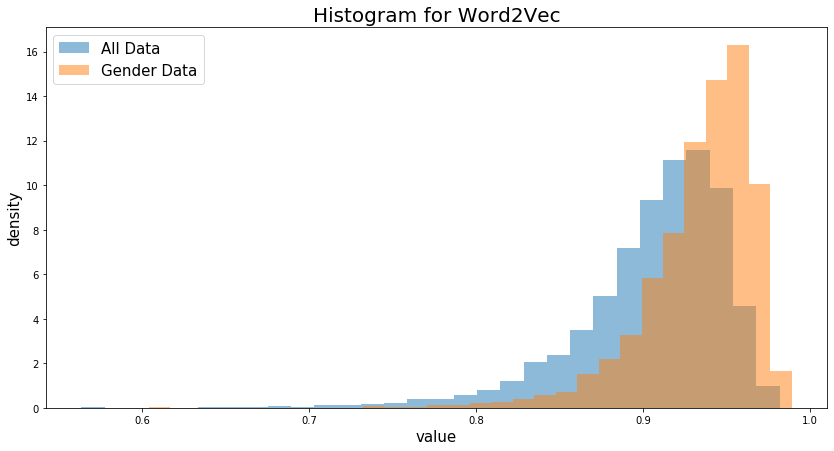

In [12]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot()
ax.hist(cos_list, bins=30, alpha=0.5, normed=True, label="All Data")
ax.hist(gender_cos_list, bins=30, alpha=0.5, normed=True, label="Gender Data")
ax.legend(fontsize=15)
plt.xlabel('value', fontsize=15)
plt.ylabel('density', fontsize=15)
plt.title('Histogram for Word2Vec', fontsize=20)
plt.savefig("word2vec.tiff")

print("Mean of Cos similarity of the overall data :", np.mean(cos_list))
print("Mean of Cos similarity of the gender data :", np.mean(gender_cos_list))

## Similarity of posts between each group.

In [13]:
r.seed(0)
group_cos_list = []
for i in tqdm(range(1,13)):
    for j in range(i,13):
        idx_i = gender_data['label']==i
        idx_j = gender_data['label']==j
        M = 100
        cnt=0
        while(cnt<M):
            text_i = r.choices(list(gender_data[idx_i]["text"]))[0]
            text_j = r.choices(list(gender_data[idx_j]["text"]))[0]
            try:
                vector_i = avg_feature_vector(text_i, word2vec_model, 300)
                vector_j = avg_feature_vector(text_j, word2vec_model, 300)
            except KeyError as error:
                print(error)
                continue
            sim = cos_sim(vector_i, vector_j)
            group_cos_list.append([sim, i, j])
            cnt += 1

"word 'そうじゃない' not in vocabulary"
"word 'LINEQ' not in vocabulary"
"word 'こわい〜' not in vocabulary"
"word '今川焼き' not in vocabulary"
"word '女に' not in vocabulary"
"word 'なぁっ' not in vocabulary"
"word '可愛いっ' not in vocabulary"
"word '載っけ' not in vocabulary"
"word '大っきく' not in vocabulary"
"word 'ぬるかっ' not in vocabulary"
"word '女に' not in vocabulary"
"word '大っきく' not in vocabulary"
"word 'ゲスの極み乙女' not in vocabulary"
"word '女に' not in vocabulary"
"word 'ゲスの極み乙女' not in vocabulary"
"word 'むりやって' not in vocabulary"
"word '着替えろ' not in vocabulary"
"word '............' not in vocabulary"
"word '他中' not in vocabulary"
"word '豊田エリー' not in vocabulary"
"word 'サイゼリア' not in vocabulary"
"word '社会進出' not in vocabulary"
"word 'コ上' not in vocabulary"
"word 'そうじゃない' not in vocabulary"
"word 'おうん' not in vocabulary"
"word '女に' not in vocabulary"
"word 'インキャグループ' not in vocabulary"
"word '付き合' not in vocabulary"
"word '∇、°)' not in vocabulary"
"word '?。''' not in vocabulary"
"word '大多数' not in vocabulary"

"word '(^_^;))' not in vocabulary"
"word 'ぬるかっ' not in vocabulary"
"word '東京急行電鉄株式会社' not in vocabulary"
"word 'うっとうしかっ' not in vocabulary"
"word 'しめろ' not in vocabulary"
"word 'しめろ' not in vocabulary"
"word 'しめろ' not in vocabulary"
"word 'LINEQ' not in vocabulary"
"word '卑女' not in vocabulary"
"word '応募ハガキ' not in vocabulary"
"word '女に' not in vocabulary"
"word 'サイゼリア' not in vocabulary"
"word 'スィーツバイキング' not in vocabulary"
"word 'こわい〜' not in vocabulary"
"word 'めんどくさいっ' not in vocabulary"
"word '大多数' not in vocabulary"
"word 'レディースデイ' not in vocabulary"
"word '(T^T)' not in vocabulary"
"word '今川焼き' not in vocabulary"
"word 'ないわー' not in vocabulary"
"word 'そうじゃない' not in vocabulary"
"word 'れーと' not in vocabulary"
"word 'ダニエルウェリントン' not in vocabulary"
"word '悪い意味' not in vocabulary"
"word '着替えろ' not in vocabulary"
"word 'るのー' not in vocabulary"
"word 'ゎするやろ' not in vocabulary"
"word 'ざいし' not in vocabulary"
"word '社会進出' not in vocabulary"
"word 'ホンマでっかTV' not in vocabulary"
"word 'おうん'

"word 'なのかな' not in vocabulary"
"word 'キッズサイズ' not in vocabulary"
"word '入園料' not in vocabulary"
"word 'ドロっと' not in vocabulary"
"word 'あざーす' not in vocabulary"
"word 'パンティーチャー' not in vocabulary"
"word 'なぁっ' not in vocabulary"
"word 'からいー' not in vocabulary"
"word 'わるかっ' not in vocabulary"
"word 'ダイコクドラッグ' not in vocabulary"
"word 'みたせる' not in vocabulary"
"word '回らない寿司屋' not in vocabulary"
"word 'ですか' not in vocabulary"
"word 'お腹の子' not in vocabulary"
"word '女に' not in vocabulary"
"word '食べ方' not in vocabulary"
"word '垂流し' not in vocabulary"
"word 'どさっと' not in vocabulary"
"word '猫撫で声' not in vocabulary"
"word 'ずーと' not in vocabulary"
"word '得し' not in vocabulary"
"word 'かわいいっ' not in vocabulary"
"word 'グルーニー' not in vocabulary"
"word 'ことば遣い' not in vocabulary"
"word 'ユーホーキャッチャーコーナー' not in vocabulary"
"word '表面的' not in vocabulary"
"word '子宮がん検診' not in vocabulary"
"word 'チクっ' not in vocabulary"
"word 'した萌え' not in vocabulary"
"word '電話き' not in vocabulary"
"word 'ダイコクドラッグ' not in v

"word '好きだ' not in vocabulary"
"word 'なぁーい' not in vocabulary"
"word '梅田スカイビル' not in vocabulary"
"word '痴漢防止' not in vocabulary"
"word '所帯持' not in vocabulary"
"word '相席屋' not in vocabulary"
"word 'グチグチ' not in vocabulary"
"word '小1時間' not in vocabulary"
"word 'くさーく' not in vocabulary"
"word '排卵日検査薬' not in vocabulary"
"word 'スバイシー' not in vocabulary"
"word '使て' not in vocabulary"
"word 'ストロベリーシェイク' not in vocabulary"
"word 'コウカシアン' not in vocabulary"
"word 'レディースランチ' not in vocabulary"
"word 'ジロッと' not in vocabulary"
"word 'キショクワルイ' not in vocabulary"
"word 'アリオ亀有' not in vocabulary"
"word 'ジモティー' not in vocabulary"
"word '12人目' not in vocabulary"
"word 'futafuta' not in vocabulary"
"word 'ゲスの極み乙女' not in vocabulary"
"word '極り' not in vocabulary"
"word '社会進出' not in vocabulary"
"word '3倍返し' not in vocabulary"
"word '女に' not in vocabulary"
"word 'ペラペラペラペラ' not in vocabulary"
"word '飽きれ' not in vocabulary"
"word '女に' not in vocabulary"
"word '女モノ' not in vocabulary"
"word 'ヒョイっと' not i

"word '世界の果てまでイッテQ!' not in vocabulary"
"word '女に' not in vocabulary"
"word 'なのかな' not in vocabulary"
"word '男女産み分け' not in vocabulary"
"word '清家篤' not in vocabulary"
"word 'やせよ' not in vocabulary"
"word 'り性' not in vocabulary"
"word '〜〜!' not in vocabulary"
"word '`)...' not in vocabulary"
"word 'ペチャクチャ' not in vocabulary"
"word 'マタニティマーク' not in vocabulary"
"word '(ー' not in vocabulary"
"word '心許な' not in vocabulary"
"word '隠せよ' not in vocabulary"
"word 'うぉーー' not in vocabulary"
"word '盗みみ' not in vocabulary"
"word '寝かしつけよ' not in vocabulary"
"word '重要視' not in vocabulary"
"word '余計な一言' not in vocabulary"
"word '婦人科検診' not in vocabulary"
"word '勿体な' not in vocabulary"
"word 'ゃかいなきがします' not in vocabulary"
"word 'ですか' not in vocabulary"
"word 'うぉーー' not in vocabulary"
"word 'もみない' not in vocabulary"
"word '男性保育士' not in vocabulary"
"word '蓮田市内' not in vocabulary"
"word '~?!」「' not in vocabulary"
"word '青田典子' not in vocabulary"
"word '社会進出' not in vocabulary"
"word 'ひん曲げ' not in vocabul

"word '黒田勇樹' not in vocabulary"
"word 'ドンフリークス・ネテロジュニア' not in vocabulary"
"word 'レディースデイ' not in vocabulary"
"word '京急百貨店' not in vocabulary"
"word '養えれ' not in vocabulary"
"word 'ズンバレッスン' not in vocabulary"
"word '和食さと' not in vocabulary"
"word 'お腹の赤ちゃん' not in vocabulary"
"word '売りきれ' not in vocabulary"
"word 'くんわ' not in vocabulary"
"word '同じ穴の狢' not in vocabulary"
"word '腐向け' not in vocabulary"
"word 'ぎゅう詰め' not in vocabulary"
"word '結婚活動' not in vocabulary"
"word 'オムツスキマ' not in vocabulary"
"word '男性保育士' not in vocabulary"
"word 'ゃぁきゃぁ' not in vocabulary"
"word 'はりあい' not in vocabulary"
"word '...!!' not in vocabulary"
"word 'オムツスキマ' not in vocabulary"
"word '恋愛関係' not in vocabulary"
"word '(^_^;)' not in vocabulary"
"word '変質者' not in vocabulary"
"word 'わりかし' not in vocabulary"
"word '(◯' not in vocabulary"
"word '思わせ振り' not in vocabulary"
"word 'キス写真' not in vocabulary"
"word 'シュンソク' not in vocabulary"
"word 'キメキメ' not in vocabulary"
"word '言い聞かす' not in vocabulary"
"word 'ダメ夫'

"word '雪玉' not in vocabulary"
"word '~。' not in vocabulary"
"word '駆けずり回ら' not in vocabulary"
"word '不満感' not in vocabulary"
"word '有ろ' not in vocabulary"
"word '❗❗❗' not in vocabulary"
"word '恋愛感情' not in vocabulary"
"word 'デカデカ' not in vocabulary"
"word 'たまーに' not in vocabulary"
"word '人工的' not in vocabulary"
"word '付けまつげ' not in vocabulary"
"word '裏返ら' not in vocabulary"
"word '....(?' not in vocabulary"
"word '不満感' not in vocabulary"
"word '箱崎駅' not in vocabulary"
"word '東北医科薬科大学' not in vocabulary"
"word '・・オェ' not in vocabulary"
"word '~。' not in vocabulary"
"word '断れよ' not in vocabulary"
"word 'プシュッと' not in vocabulary"
"word '男性下着' not in vocabulary"
"word '福岡弁' not in vocabulary"
"word '家族に乾杯' not in vocabulary"
"word '女に' not in vocabulary"
"word 'たまーに' not in vocabulary"
"word '福島県立小名浜高等学校' not in vocabulary"
"word '社会進出' not in vocabulary"
"word '男性保育士' not in vocabulary"
"word '又もや' not in vocabulary"
"word 'イヤフォン' not in vocabulary"
"word '福島県立小名浜高等学校' not in vocabulary"


"word 'おやつタイム' not in vocabulary"
"word 'ごーーー' not in vocabulary"
"word '(><)' not in vocabulary"
"word 'フルラ' not in vocabulary"
"word '妊婦マーク' not in vocabulary"
"word 'ジーッと' not in vocabulary"
"word '木を見て森を見ず' not in vocabulary"
"word 'フトリ' not in vocabulary"
"word 'ビジネスカジュアル' not in vocabulary"
"word '生存率' not in vocabulary"
"word 'エイハラ' not in vocabulary"
"word '!(●`' not in vocabulary"
"word '手間ひま' not in vocabulary"
"word '女に' not in vocabulary"
"word 'ノタノタ' not in vocabulary"
"word 'Xジェンダー' not in vocabulary"
"word 'スカンツ' not in vocabulary"
"word '。///' not in vocabulary"
"word '石川敏男' not in vocabulary"
"word 'フランス杯' not in vocabulary"
"word 'びつくり' not in vocabulary"
"word '女に' not in vocabulary"
"word 'なん事' not in vocabulary"
"word '我利我利亡者' not in vocabulary"
"word 'ゲスの極み乙女' not in vocabulary"
"word '.../(_' not in vocabulary"
"word 'ワンダーメイク' not in vocabulary"
"word 'ずかずか' not in vocabulary"
"word '尻軽女' not in vocabulary"
"word 'Bellclassic' not in vocabulary"
"word '不愉快です' not

"word 'パトリック・チャン' not in vocabulary"
"word '有効期限' not in vocabulary"
"word '女に' not in vocabulary"
"word '言い方!' not in vocabulary"
"word 'ジャパネットタカタ' not in vocabulary"
"word '女に' not in vocabulary"
"word '店舗側' not in vocabulary"
"word '❓' not in vocabulary"
"word '時代背景' not in vocabulary"
"word '❓' not in vocabulary"
"word 'とくだね' not in vocabulary"
"word 'ふさわしいっ' not in vocabulary"
"word '❓' not in vocabulary"
"word '鉄欠乏症' not in vocabulary"
"word 'ショップグッツ' not in vocabulary"
"word 'ミットモナイ' not in vocabulary"
"word '女に' not in vocabulary"
"word 'ボロカス' not in vocabulary"
"word 'なつける' not in vocabulary"
"word 'たまーに' not in vocabulary"
"word '一体型' not in vocabulary"
"word 'ゼクシオ' not in vocabulary"
"word 'ひん曲げ' not in vocabulary"
"word '痴漢免罪' not in vocabulary"
"word 'ボロカス' not in vocabulary"
"word '相応し' not in vocabulary"
"word '大人用' not in vocabulary"
"word '吊り橋効果' not in vocabulary"
"word 'ツケマ' not in vocabulary"
"word '❓' not in vocabulary"
"word 'ぼろっ' not in vocabulary"
"word 'バァー' no

"word 'リニュウアル' not in vocabulary"
"word '!?\\(^' not in vocabulary"
"word 'びくつき' not in vocabulary"
"word '2人目' not in vocabulary"
"word '八事駅' not in vocabulary"
"word '八事駅' not in vocabulary"
"word 'ファーストネーム' not in vocabulary"
"word 'ロペピクニック' not in vocabulary"
"word '大阪ダブル選挙' not in vocabulary"
"word '女に' not in vocabulary"
"word '湯楽の里' not in vocabulary"
"word 'イライラー' not in vocabulary"
"word '喜多嶋舞' not in vocabulary"
"word 'そで丈' not in vocabulary"
"word 'ゲスの極み乙女' not in vocabulary"
"word 'カルピスソーダー' not in vocabulary"
"word 'きつ〜い' not in vocabulary"
"word '携帯灰皿' not in vocabulary"
"word 'チッと' not in vocabulary"
"word '喜多嶋舞' not in vocabulary"
"word 'どすんと' not in vocabulary"
"word 'スカルプシャンプー' not in vocabulary"
"word '下衆の極み' not in vocabulary"
"word 'ベチャベチャ' not in vocabulary"
"word '1000円カット' not in vocabulary"
"word '来そ' not in vocabulary"
"word 'イヤフォン' not in vocabulary"
"word '...!?' not in vocabulary"
"word '仰向い' not in vocabulary"
"word 'PYA' not in vocabulary"
"word '隣り合わせる' 

"word '(●`' not in vocabulary"
"word '悪いん' not in vocabulary"
"word '砂糖税' not in vocabulary"
"word '性的欲求' not in vocabulary"
"word 'BROTURES' not in vocabulary"
"word ';∀;)(' not in vocabulary"
"word 'デートDV' not in vocabulary"
"word 'スメハラ' not in vocabulary"
"word 'テープル' not in vocabulary"
"word '我がもの顔' not in vocabulary"
"word '!(●`' not in vocabulary"
"word '...!?' not in vocabulary"
"word 'PYA' not in vocabulary"
"word '1000円カット' not in vocabulary"
"word '鼻白む' not in vocabulary"
"word '・・オェ' not in vocabulary"
"word 'ホザ' not in vocabulary"
"word '隣り合わせる' not in vocabulary"
"word '取直し' not in vocabulary"
"word '混欲' not in vocabulary"
"word '松田悟志' not in vocabulary"
"word '砂糖税' not in vocabulary"
"word '謝れよ' not in vocabulary"
"word '秋川渓谷瀬音の湯' not in vocabulary"
"word '指サック' not in vocabulary"
"word 'ろう城' not in vocabulary"
"word 'ユニセックストイレ' not in vocabulary"
"word '~。' not in vocabulary"
"word 'ピューン' not in vocabulary"
"word 'イノダ' not in vocabulary"
"word '女性の力' not in vocabulary"
"

"word 'サッカー台' not in vocabulary"
"word 'レディースデイ' not in vocabulary"
"word 'いいいいいいいいい' not in vocabulary"
"word '岩倉高校' not in vocabulary"
"word '後棒' not in vocabulary"
"word '愛知県大府市' not in vocabulary"
"word '<_' not in vocabulary"
"word 'レディースディ' not in vocabulary"
"word '我がもの顔' not in vocabulary"
"word 'ビックマック' not in vocabulary"
"word '田嶋陽子' not in vocabulary"
"word '不愉快です' not in vocabulary"
"word 'いいいいいいいいい' not in vocabulary"
"word ';∀;)(' not in vocabulary"
"word 'ワカル' not in vocabulary"
"word '邪魔くさい' not in vocabulary"
"word '難ご' not in vocabulary"
"word 'うっとうしかっ' not in vocabulary"
"word '(^_^;))' not in vocabulary"
"word 'スペヤ' not in vocabulary"
"word 'ゃいいじゃん' not in vocabulary"
"word '応募ハガキ' not in vocabulary"
"word 'ないわー' not in vocabulary"
"word 'レディースDAY' not in vocabulary"
"word '不愉快です' not in vocabulary"
"word '砂糖税' not in vocabulary"
"word '高知東生' not in vocabulary"
"word '東京・小金井市' not in vocabulary"
"word 'レディースディ' not in vocabulary"
"word '101円' not in vocabulary"
"wor

"word 'なつける' not in vocabulary"
"word 'ワン・ポン・パッ' not in vocabulary"
"word '堪っ' not in vocabulary"
"word 'キモチワルイ' not in vocabulary"
"word '❕' not in vocabulary"
"word '成績優秀' not in vocabulary"
"word '12人目' not in vocabulary"
"word '葛飾区金町' not in vocabulary"
"word 'あらためろ' not in vocabulary"
"word '携帯灰皿' not in vocabulary"
"word '12人目' not in vocabulary"
"word '新潟市秋葉区' not in vocabulary"
"word 'ナデシコジャパン' not in vocabulary"
"word 'なん事' not in vocabulary"
"word '金髪豚野郎' not in vocabulary"
"word '痴漢防止' not in vocabulary"
"word '名城公園' not in vocabulary"
"word 'ランチパスポート' not in vocabulary"
'word \'!../(~"\' not in vocabulary'
"word 'レデイース' not in vocabulary"
"word 'アナウサー' not in vocabulary"
"word '大人用' not in vocabulary"
"word '新潟市秋葉区' not in vocabulary"
"word 'レディース割引' not in vocabulary"
"word '何千円' not in vocabulary"
"word 'アナウサー' not in vocabulary"
"word 'ランチパスポート' not in vocabulary"
"word '4760円' not in vocabulary"
"word '1000円カット' not in vocabulary"
"word 'びつくり' not in vocabulary"
"word '

"word 'レディースデイ' not in vocabulary"
"word 'すれれ' not in vocabulary"
"word '女に' not in vocabulary"
"word 'べちゃくちゃ' not in vocabulary"
"word '撫ぜる' not in vocabulary"
"word '得意料理' not in vocabulary"
"word '話しこん' not in vocabulary"
"word '金光大阪高等学校' not in vocabulary"
"word 'バタンバタン' not in vocabulary"
"word 'づつしかないためすぐに' not in vocabulary"
"word '協さん' not in vocabulary"
"word '有難み' not in vocabulary"
"word '東京・小金井市' not in vocabulary"
"word '我がもの顔' not in vocabulary"
"word 'ちっさ' not in vocabulary"
"word '廃っ' not in vocabulary"
"word '354292013235' not in vocabulary"
"word 'yyc' not in vocabulary"
"word '得意料理' not in vocabulary"
"word 'なにやってんの' not in vocabulary"
"word '不愉快です' not in vocabulary"
"word '多そう' not in vocabulary"
"word '羨ましいっ' not in vocabulary"
"word '女に' not in vocabulary"
"word 'キャンディーキャンディー' not in vocabulary"
"word '女子アナの罰' not in vocabulary"
"word 'フランス杯' not in vocabulary"
"word '社会進出' not in vocabulary"
"word 'オエー' not in vocabulary"
"word '汗臭く' not in vocabulary"
"word 'アメ

"word 'ナデシコジャパン' not in vocabulary"
"word '高畑裕太' not in vocabulary"
"word 'レディース割引' not in vocabulary"
"word 'ゲスの極み乙女' not in vocabulary"
"word 'バラつく' not in vocabulary"
"word 'ナデシコジャパン' not in vocabulary"
"word '八事駅' not in vocabulary"
"word '下衆の極み' not in vocabulary"
"word '八事駅' not in vocabulary"
"word '高畑裕太' not in vocabulary"
"word '葛飾区金町' not in vocabulary"
"word 'こんがらかっ' not in vocabulary"
"word 'ワンダーメイク' not in vocabulary"
"word 'リニュウアル' not in vocabulary"
"word 'ワン・ポン・パッ' not in vocabulary"
"word 'ゲスの極み乙女' not in vocabulary"
"word '尻軽女' not in vocabulary"
"word 'ナデシコジャパン' not in vocabulary"



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


[[0.92935815 0.92569479 0.92737572 0.92404034 0.92597579 0.92157449
  0.92254474 0.91532449 0.92406331 0.92389885 0.92283888 0.91817455]
 [0.92569479 0.93048994 0.93529283 0.93772246 0.93858837 0.93631631
  0.92825429 0.92846115 0.93458599 0.92907704 0.9298066  0.92986888]
 [0.92737572 0.93529283 0.94101383 0.92941996 0.93505775 0.93778823
  0.9284219  0.92938708 0.92668344 0.93095648 0.92375819 0.9258171 ]
 [0.92404034 0.93772246 0.92941996 0.94611345 0.93878459 0.93808634
  0.92768592 0.9305393  0.93008784 0.9382063  0.93132404 0.93242069]
 [0.92597579 0.93858837 0.93505775 0.93878459 0.94198413 0.94229404
  0.92432732 0.925846   0.93953143 0.93149657 0.9308011  0.92877862]
 [0.92157449 0.93631631 0.93778823 0.93808634 0.94229404 0.94087331
  0.92867065 0.92346717 0.93142714 0.93626767 0.92921151 0.93370104]
 [0.92254474 0.92825429 0.9284219  0.92768592 0.92432732 0.92867065
  0.92055542 0.91979004 0.92700439 0.92469442 0.92673457 0.91773436]
 [0.91532449 0.92846115 0.92938708 0.9305

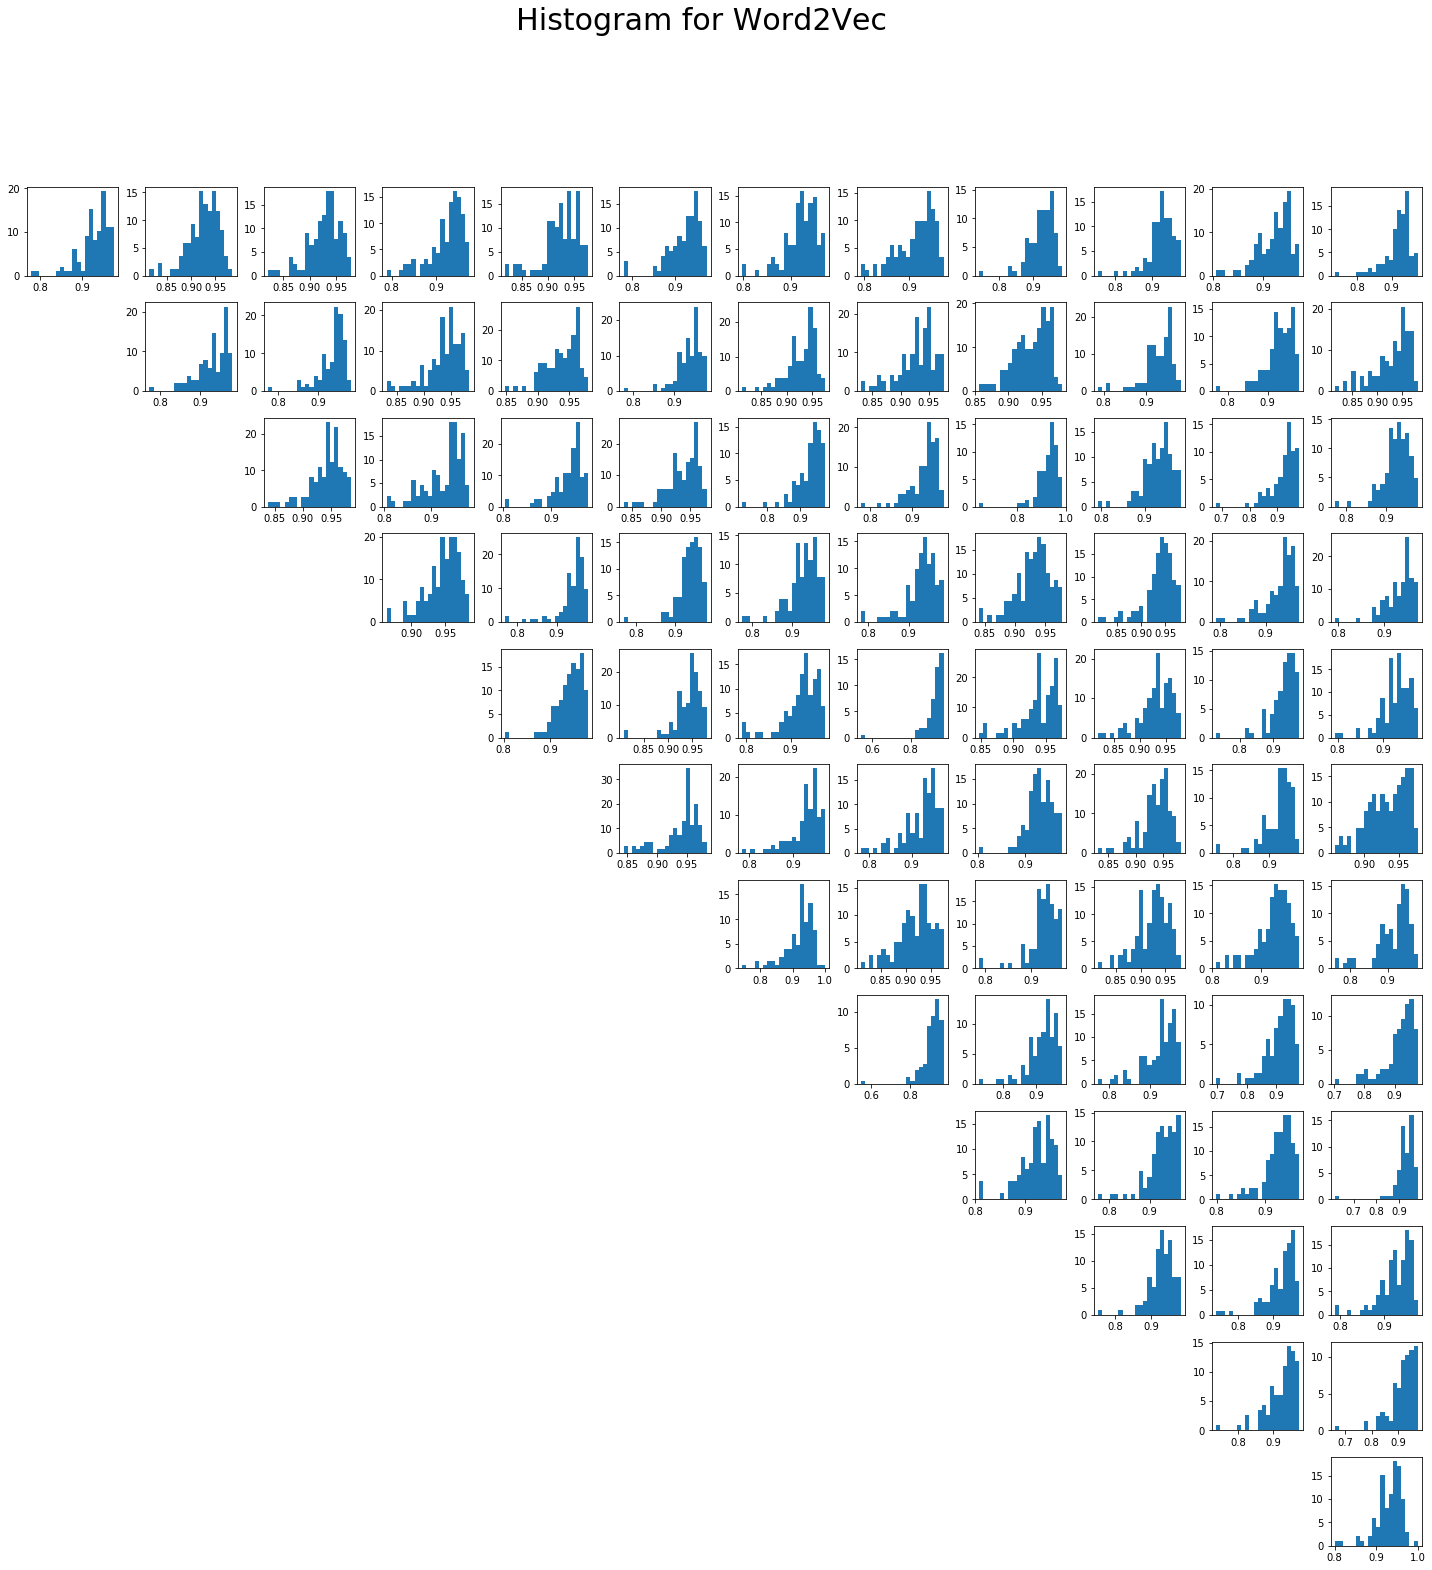

In [14]:
fig = plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.3,wspace=0.3)
gs = gridspec.GridSpec(12, 12)
g = np.array(group_cos_list)
mat = np.zeros((12,12))

for i in range(12):
    for j in range(i,12):
        ax = fig.add_subplot(gs[i,j])
        plt.subplot(gs[i,j])
        idx = (g.T[1]==(i+1))*(g.T[2]==(j+1))
        ax.hist(g.T[0][idx], bins=20, normed=True)
        mat[i][j] = np.mean(g.T[0][idx])
        mat[j][i] = mat[i][j]

fig.suptitle('Histogram for Word2Vec', fontsize=30)
print(mat)

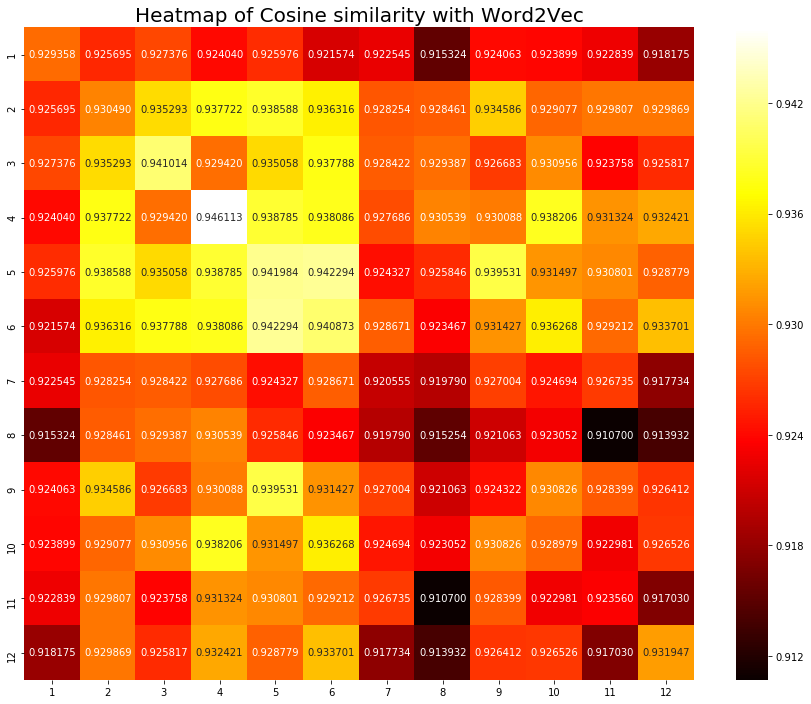

In [15]:
import seaborn as sns
plt.figure(figsize=(15, 12))
sns.heatmap(mat, annot=True, fmt="f", cmap='hot')
plt.xticks(np.array(range(12))+0.5, np.array(range(1,13)))
plt.yticks(np.array(range(12))+0.5, np.array(range(1,13)))
plt.ylim(mat.shape[0],0)
plt.title('Heatmap of Cosine similarity with Word2Vec', fontsize=20)
plt.savefig("heat_Word2Vec.eps")
plt.savefig("heat_Word2Vec.pdf")

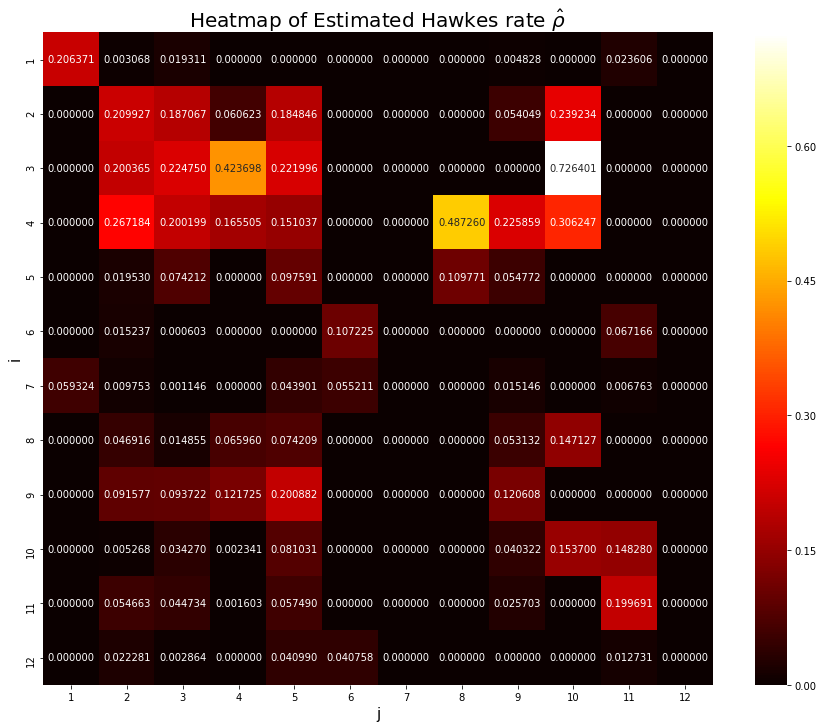

In [16]:
est_pass = '/Users/goda/Desktop/Dissatisfaction/gender/2ndQMLE_res_gender_over400_12.csv'
est = pd.read_csv(est_pass)['0']
dim=12
est_mu = np.array(est[:dim])
est_alpha = np.array(est[dim:(dim+dim**2)]).reshape((dim, dim))
est_beta = np.array(est[(dim+dim**2):]).reshape((dim, dim))
est_rho = est_alpha/est_beta

plt.figure(figsize=(15, 12))
sns.heatmap(est_rho, annot=True, fmt="f", cmap='hot')
plt.xticks(np.array(range(12))+0.5, np.array(range(1,13)))
plt.yticks(np.array(range(12))+0.5, np.array(range(1,13)))
plt.ylim(est_rho.shape[0],0)
plt.xlabel('j', fontsize=15)
plt.ylabel('i', fontsize=15)
plt.title('Heatmap of Estimated Hawkes rate' + r' $\hat{\rho}$', fontsize=20)
plt.savefig("heat_Hawkes.eps")
plt.savefig("heat_Hawkes.pdf")

## Calculating Spearman's rank correlation coefficient

\begin{align*}
Spearman(X, Y) = 1 - \frac{6\sum_{i=1}^ND^2}{N(N^2-1)}
\end{align*}

$D=$ The difference in rank between the corresponding X and Y values

$N=$ Number of pairs of values

In [22]:
from scipy.stats import spearmanr
spearmanr(mat.flatten(),sym_rho.flatten())

SpearmanrResult(correlation=0.417996935540791, pvalue=1.85888775799244e-07)

In [73]:
spearmanr(mat.flatten(),est_rho.flatten())

SpearmanrResult(correlation=0.3750357377208533, pvalue=3.6321103432133e-06)